In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

A.2: Recover Homographies

In [2]:


def computeH(im1_pts, im2_pts):

    N = im1_pts.shape[0]
    A = []

    for i in range(N):
        x, y = im1_pts[i]
        x_prime, y_prime = im2_pts[i]

        A.append([-x, -y, -1, 0, 0, 0, x * x_prime, y * x_prime, x_prime])
        A.append([0, 0, 0, -x, -y, -1, x * y_prime, y * y_prime, y_prime])

    A = np.array(A)

    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1, :]  

    H = h.reshape((3, 3))

    H = H / H[2, 2]

    return H

In [4]:

im_1 = np.array([(836, 2349), (955, 836), (454, 2206), (503, 1757), (542, 1336), (585, 928), (301, 2142), (356, 1593), (412, 1078), (475, 793)])
im_2 = np.array([(1994, 2331), (2308, 905), (1670, 2189), (1692, 1786), (1712, 1406), (1728, 1031), (1545, 2125), (1571, 1640), (1598, 1186), (1637, 920)])
computeH(im_1, im_2)

array([[ 3.12762216e-01,  2.83410403e-02,  1.28194425e+03],
       [-5.09921016e-01,  7.96243005e-01,  4.31674876e+02],
       [-3.07684905e-04,  1.97543799e-05,  1.00000000e+00]])

A.3

In [10]:

def warpImageNearestNeighbor(im, H):
    H_inv = np.linalg.inv(H)
    h_out, w_out = im.shape[:2]
    channels = im.shape[2] if im.ndim == 3 else 1
    imwarped = np.zeros((h_out, w_out, channels), dtype=im.dtype)

    for y_out in range(h_out):
        for x_out in range(w_out):
            out_coord = np.array([x_out, y_out, 1])
            in_coord = H_inv @ out_coord
            in_coord /= in_coord[2]

            x_in, y_in = in_coord[0], in_coord[1]
            x_nn, y_nn = int(round(x_in)), int(round(y_in))

            if 0 <= x_nn < w_out and 0 <= y_nn < h_out:
                if channels > 1:
                    imwarped[y_out, x_out] = im[y_nn, x_nn]
                else:
                    imwarped[y_out, x_out, 0] = im[y_nn, x_nn]

    return imwarped.squeeze()


In [22]:
def warpImageBilinear(im, H, output_shape=None):
    H_inv = np.linalg.inv(H)
    h_out, w_out = output_shape if output_shape else im.shape[:2]
    channels = im.shape[2] if im.ndim == 3 else 1
    imwarped = np.zeros((h_out, w_out, channels), dtype=im.dtype)

    for y_out in range(h_out):
        for x_out in range(w_out):
            out_coord = np.array([x_out, y_out, 1])
            in_coord = H_inv @ out_coord
            in_coord /= in_coord[2]

            x_in, y_in = in_coord[0], in_coord[1]

            if 0 <= x_in < im.shape[1] - 1 and 0 <= y_in < im.shape[0] - 1:
                x0, y0 = int(np.floor(x_in)), int(np.floor(y_in))
                x1, y1 = x0 + 1, y0 + 1
                dx, dy = x_in - x0, y_in - y0

                if channels > 1:
                    top = (1 - dx) * im[y0, x0] + dx * im[y0, x1]
                    bottom = (1 - dx) * im[y1, x0] + dx * im[y1, x1]
                else:
                    top = (1 - dx) * im[y0, x0] + dx * im[y0, x1]
                    bottom = (1 - dx) * im[y1, x0] + dx * im[y1, x1]

                interpolated = (1 - dy) * top + dy * bottom
                imwarped[y_out, x_out] = interpolated

    return imwarped.squeeze()


In [57]:
im = cv2.imread("tilted_card.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_1_pts = np.array([[356.97294372, 480.87337662], [706.82954545, 526.66612554], [664.70021645, 1026.72294372], [203.10930736, 953.45454545]])
im_2_pts = np.array([[300, 450], [680, 450], [680, 975], [300, 975]])
H = computeH(im_1_pts, im_2_pts)

In [58]:
im_nn = warpImageNearestNeighbor(im, H)

In [59]:
im_bil = warpImageBilinear(im, H)

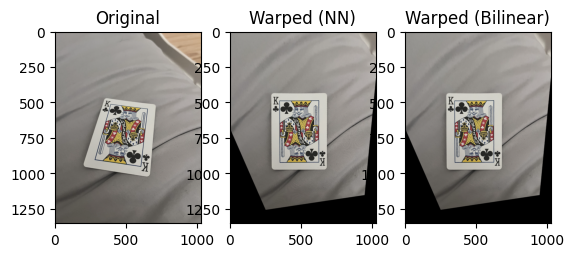

In [60]:
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.title("Original")
plt.imsave("card_original.png", im)

plt.subplot(1, 3, 2)
plt.imshow(im_nn)
plt.title("Warped (NN)")
plt.imsave("card_nn.png", im_nn)

plt.subplot(1, 3, 3)
plt.imshow(im_bil)
plt.title("Warped (Bilinear)")
plt.imsave("card_bilinear.png", im_bil)
plt.show()

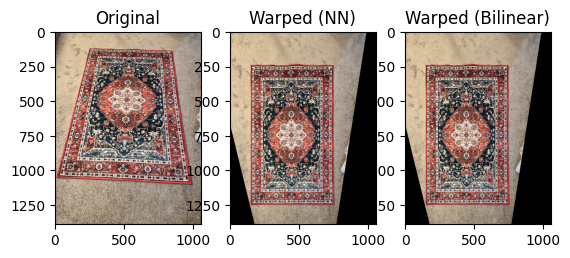

In [55]:
im = cv2.imread("rug.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_1_pts = np.array([[ 249.61700337,  127.61868687],
 [ 852.39327802,  144.33345358],
 [  11.43157768, 1055.28823954],
 [ 986.11141174, 1103.34319384]])
im_2_pts = np.array([[150, 250], [750, 250], [150, 1250], [750, 1250]])
H = computeH(im_1_pts, im_2_pts)


In [ ]:
im_nn = warpImageNearestNeighbor(im, H)

In [ ]:
im_bil = warpImageBilinear(im, H)

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.title("Original")
plt.imsave("rug_original.png", im)

plt.subplot(1, 3, 2)
plt.imshow(im_nn)
plt.title("Warped (NN)")
plt.imsave("rug_nn.png", im_nn)


plt.subplot(1, 3, 3)
plt.imshow(im_bil)
plt.title("Warped (Bilinear)")
plt.imsave("rug_bilinear.png", im_bil)

plt.show()

In [37]:
def get_output_limits(im1, im2, H):
    h1, w1 = im1.shape[:2]
    h2, w2 = im2.shape[:2]

    corners1 = np.array([
        [0, 0], [w1, 0], [w1, h1], [0, h1]
    ])
    ones = np.ones((4, 1))
    corners1_homog = np.hstack([corners1, ones])
    warped_corners1 = (H @ corners1_homog.T).T
    warped_corners1 /= warped_corners1[:, [2]]

    corners2 = np.array([
        [0, 0], [w2, 0], [w2, h2], [0, h2]
    ])

    all_x = np.hstack([warped_corners1[:, 0], corners2[:, 0]])
    all_y = np.hstack([warped_corners1[:, 1], corners2[:, 1]])

    min_x = int(np.floor(all_x.min()))
    max_x = int(np.ceil(all_x.max()))
    min_y = int(np.floor(all_y.min()))
    max_y = int(np.ceil(all_y.max()))

    return min_x, max_x, min_y, max_y


def warp_with_offset(im, H, output_shape, offset):
    H_offset = np.array([[1, 0, -offset[0]],
                         [0, 1, -offset[1]],
                         [0, 0, 1]]) @ H

    return warpImageBilinear(im, H_offset, output_shape)


def create_alpha_mask(shape):
    h, w = shape[:2]
    y, x = np.mgrid[0:h, 0:w]
    cx, cy = w / 2, h / 2

    dist = np.sqrt((x - cx)**2 + (y - cy)**2)
    max_dist = np.sqrt((cx)**2 + (cy)**2)

    alpha = 1 - (dist / max_dist)
    alpha = np.clip(alpha, 0, 1)
    return alpha

In [42]:
def blend_images(im1, im2, H):
    min_x, max_x, min_y, max_y = get_output_limits(im1, im2, H)
    width = max_x - min_x
    height = max_y - min_y
    offset = (min_x, min_y)

    warped_im1 = warp_with_offset(im1, H, (height, width), offset)
    alpha1 = create_alpha_mask(im1.shape)
    warped_alpha1 = warp_with_offset(np.expand_dims(alpha1, axis=2), H, (height, width), offset)
    if warped_alpha1.ndim == 2:
        warped_alpha1 = np.expand_dims(warped_alpha1, axis=2)

    valid_mask1 = np.any(warped_im1 > 0, axis=2, keepdims=True).astype(np.float32)
    warped_alpha1 *= valid_mask1


    canvas_im2 = np.zeros_like(warped_im1)
    alpha2 = create_alpha_mask(im2.shape)

    x_off, y_off = -min_x, -min_y
    canvas_im2[y_off:y_off + im2.shape[0], x_off:x_off + im2.shape[1]] = im2
    canvas_alpha2 = np.zeros((height, width, 1))
    canvas_alpha2[y_off:y_off + im2.shape[0], x_off:x_off + im2.shape[1], 0] = alpha2
    valid_mask2 = np.any(canvas_im2 > 0, axis=2, keepdims=True).astype(np.float32)
    canvas_alpha2 *= valid_mask2

    if warped_alpha1.ndim == 2:
        warped_alpha1 = np.expand_dims(warped_alpha1, axis=2)
    if canvas_alpha2.ndim == 2:
        canvas_alpha2 = np.expand_dims(canvas_alpha2, axis=2)
    weighted_sum = warped_im1 * warped_alpha1 + canvas_im2 * canvas_alpha2
    alpha_sum = warped_alpha1 + canvas_alpha2 + 1e-6  

    blended = weighted_sum / alpha_sum
    blended = np.clip(blended, 0, 255).astype(np.uint8)

    return blended


[[ 1.55448616e+00 -3.33898410e-02 -7.82086379e+02]
 [ 2.81726967e-01  1.35768203e+00 -2.87306283e+02]
 [ 3.86877488e-04  2.40265445e-05  1.00000000e+00]]


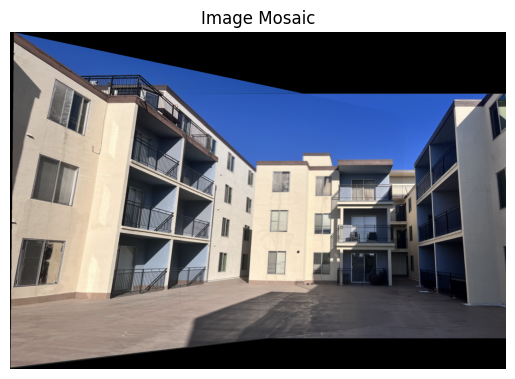

In [43]:
im1 = cv2.imread("left.png")
im2 = cv2.imread("middle.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)


im1_pts = np.array([[1538.08870968, 256.62096774],
 [817.48387097,  352.37701613],
 [796.38508065,  922.04435484],
 [1568.92540323,  972.35685484]])
im2_pts = np.array([[999.41612554, 308.78030303],
 [360.00865801, 318.11471861],
 [319.55952381, 893.73701299],
 [996.30465368, 904.6271645 ]])
H = computeH(im1_pts, im2_pts)
print(H)

mosaic = blend_images(im1, im2, H)



# Show
plt.imshow(mosaic)
plt.title("Image Mosaic")
plt.axis('off')
plt.show()
plt.imsave("apartment_mosaic.png", mosaic)

[[ 1.53604360e+00  5.59977595e-02 -8.62104157e+02]
 [ 1.82559554e-01  1.38330169e+00 -2.65244440e+02]
 [ 2.68937476e-04  1.73244903e-05  1.00000000e+00]]


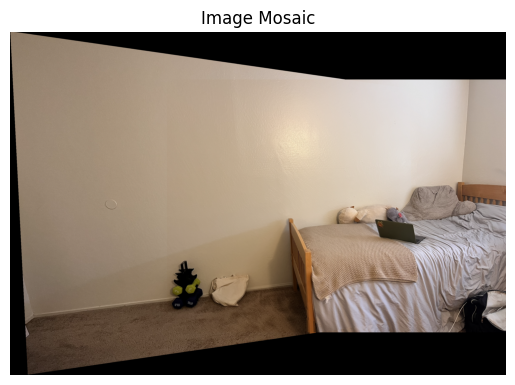

In [48]:
im1 = cv2.imread("room_left.png")
im2 = cv2.imread("room_right.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)


im1_pts = np.array([[ 585.26190476,  979.39033189],
 [ 611.41630592,  963.6976912 ],
 [1189.95165945,  958.46681097],
 [1106.25757576,  776.43217893],
 [1292.47691198, 1238.84199134],
 [1617.83766234,  787.94011544],
 [1479.74242424,  707.38455988],
 [ 889.6991342,  1052.62265512],
 [ 836.34415584, 1202.22582973],
 [ 545.50721501, 1091.33116883]])
im2_pts = np.array([[  78.18710919, 1022.47402597],
 [ 107.3958634,  1001.61063011],
 [ 761.46332371,  955.71115921],
 [ 676.96657047,  773.15644541],
 [ 874.12566138, 1235.28066378],
 [1146.39297739,  772.11327561],
 [1030.60113035,  695.96188071],
 [ 446.42604618, 1072.54617605],
 [ 390.09487734, 1239.45334295],
 [  35.41714767, 1150.78391053]])
H = computeH(im1_pts, im2_pts)
print(H)

mosaic = blend_images(im1, im2, H)



# Show
plt.imshow(mosaic)
plt.title("Image Mosaic")
plt.axis('off')
plt.show()
plt.imsave("room_mosaic.png", mosaic)

[[ 1.46944045e+00 -4.68388132e-02 -7.85573940e+02]
 [ 2.02910746e-01  1.26151346e+00 -1.65407285e+02]
 [ 2.61304497e-04 -4.40424193e-05  1.00000000e+00]]


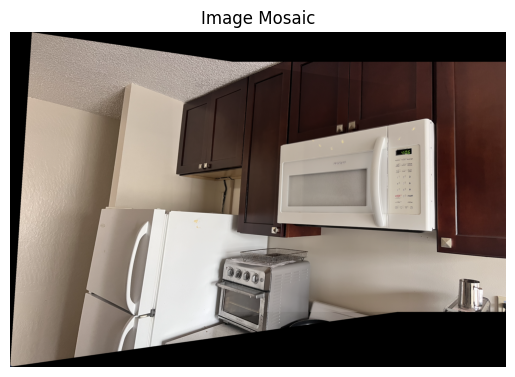

In [50]:
im1 = cv2.imread("kitchen_left.png")
im2 = cv2.imread("kitchen_right.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)


im1_pts = np.array([[ 568.58128908,  598.20538721],
 [ 589.56493506,  256.17195767],
 [ 890.68025493,   72.56505532],
 [ 868.64742665,  544.69708995],
 [ 852.90969216,  888.82888408],
 [1098.41835017,  924.50108225],
 [1296.71380471,  920.30435305],
 [1065.89369889,  431.38540164],
 [1054.3526936,   845.81240981],
 [1223.27104377, 1007.38648389]])
im2_pts = np.array([[  19.06679894,  627.73033911],
 [  62.02164502,  243.23208273],
 [ 422.42328042,   86.08020683],
 [ 383.65915103,  579.53709716],
 [ 359.56253006,  952.51088264],
 [ 629.86375661,  984.98893699],
 [ 827.87512025,  968.22607023],
 [ 604.71945647,  473.72150072],
 [ 586.90891053,  901.17460317],
 [ 757.68061568, 1060.42183742]])
H = computeH(im1_pts, im2_pts)
print(H)

mosaic = blend_images(im1, im2, H)



# Show
plt.imshow(mosaic)
plt.title("Image Mosaic")
plt.axis('off')
plt.show()
plt.imsave("kitchen_mosaic.png", mosaic)